<h1 style="color:green; margin-bottom:15px;font-size:30px">A/B Test Results Analysis</h1>

# Project Description

You are an analyst for a large online store. Together with the marketing department, you have prepared a list of hypotheses for increasing revenue. Prioritize hypotheses, run A/B test, and analyze the results.

# Contents

<ol>
<li>Libraries Import</li> 
<li>Hypotheses: Data Preprocessing</li> 
<li>Hypotheses: Data Description</li>   
<li>Hypotheses Prioritization</li>  
<li>A/B Test was conducted</li>  
<li>Data Preprocessing: Orders</li> 
<li>Data Description: Orders</li>
<li>Data Preprocessing: Visitors</li> 
<li>Data Description: Visitors</li>
<li>A/B Test Results Analysis</li>
<li>Conclusion</li>
</ol>

## 1. Libraries Import

In [1]:
import pandas as pd
import math
import numpy as np
import datetime as dt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Hypotheses: Data Preprocessing

<ul>
<li>Let's convert variable names to lowercase with an underscore instead of spaces</li>
<li>Convert variables types where needed</li>
<li>Process outliers, gaps and duplicates</li>
</ul>

In [2]:
hyp=pd.read_csv('hypothesis.csv')
display(hyp)
display(hyp.info())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,Add two new traffic channels to attract traffi...,3,10,8,6
1,"Launch your own delivery service, which will r...",2,5,4,10
2,Add recommendations to the website to increase...,8,3,7,3
3,"Change the structure of categories, which will...",8,3,3,8
4,Change the homepage background color to increa...,3,1,1,1
5,Add customer reviews page which will increase ...,3,2,2,3
6,Add banners with current promotions to the mai...,5,3,8,3
7,Add a subscription form to all main pages to b...,10,7,8,5
8,Launch a promotion that gives a birthday discount,1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

In [3]:
hyp.columns = hyp.columns.str.lower()
display(hyp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

## 3 Hypotheses: Data Description

**the table has 9 hypotheses and 5 variables describing them**

hypothesis — hypothesis name, object type;

reach — users reach on a 10-point scale, type int64;

impact - users impact on a 10-point scale, type int64;

confidence - confidence on a 10-point scale, type int64;

efforts — the cost of resources to test the hypothesis on a 10-point scale. The larger the efforts value, the more expensive the hypothesis test, type int64.

**Data does not contain gaps, outliers or duplicates. Variable types do not need to be changed. Variable names are lowercased.**

## 4. Hypotheses Prioritization 

### 4.1 ICE Framework

ICE = impact * confidence / efforts

In [4]:
hyp['ice'] = round(hyp['impact'] * hyp['confidence'] / hyp ['efforts'],2)
display(hyp.sort_values('ice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice
8,Launch a promotion that gives a birthday discount,1,9,9,5,16.20
0,Add two new traffic channels to attract traffi...,3,10,8,6,13.33
7,Add a subscription form to all main pages to b...,10,7,8,5,11.20
6,Add banners with current promotions to the mai...,5,3,8,3,8.00
2,Add recommendations to the website to increase...,8,3,7,3,7.00
1,"Launch your own delivery service, which will r...",2,5,4,10,2.00
5,Add customer reviews page which will increase ...,3,2,2,3,1.33
3,"Change the structure of categories, which will...",8,3,3,8,1.12
4,Change the homepage background color to increa...,3,1,1,1,1.00


### 4.2 RICE Framework

RICE = reach * impact * confidence / efforts

In [5]:
hyp['rice'] = round(hyp['reach'] * hyp['impact'] * hyp['confidence'] / hyp ['efforts'],2)
display(hyp.sort_values('rice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Add a subscription form to all main pages to b...,10,7,8,5,11.20,112.0
2,Add recommendations to the website to increase...,8,3,7,3,7.00,56.0
0,Add two new traffic channels to attract traffi...,3,10,8,6,13.33,40.0
6,Add banners with current promotions to the mai...,5,3,8,3,8.00,40.0
8,Launch a promotion that gives a birthday discount,1,9,9,5,16.20,16.2
3,"Change the structure of categories, which will...",8,3,3,8,1.12,9.0
1,"Launch your own delivery service, which will r...",2,5,4,10,2.00,4.0
5,Add customer reviews page which will increase ...,3,2,2,3,1.33,4.0
4,Change the homepage background color to increa...,3,1,1,1,1.00,3.0


### 4.3 Conclusion

ICE has three highest priority hypotheses: 8 (ICE 16.20), 0 (ICE 13.33), 7 (ICE 11.20)

RICE has three highest priority hypotheses: 7 (RICE 112.0), 2 (RICE 56.0), 0 (RICE 40.0).

ICE and RICE ratings are different. Hypothesis 7 has the maximum Reach parameter (10), which brought it to the first place.

It is important to consider how many users will be affected by a particular hypothesis, if analysts were guided only by the strength of hypotheses, they would start with hypothesis number 8, which will affect a very small part of users. It is better to trust the RICE framework and start with hypothesis number 7.

## 5. The A/B Test was conducted. The results can be found in the orders.csv and visitors.csv.

## 6. Data Preprocessing: Orders

In [6]:
orders=pd.read_csv('orders.csv')
display(orders)
display(orders.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

In [7]:
orders = orders.rename({'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, axis='columns')

In [8]:
print(orders['group'].value_counts())

B    640
A    557
Name: group, dtype: int64


In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
print(orders['date'].describe())

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object


Checking for intersections in groups

In [10]:
a = orders[orders['group']=='A']['visitor_id'].unique()
b = orders[orders['group']=='B']['visitor_id'].unique()

print('The number of users in group A:', len(a))
print('The number of users in group B:', len(b))

print('The number of users intersected:',pd.Series(list(set(a).intersection(set(b)))).count())

The number of users in group A: 503
The number of users in group B: 586
The number of users intersected: 58


In [11]:
print('Minimum revenue in c.u.:', orders['revenue'].min())
print('Average revenue in c.u.:', round(orders['revenue'].mean(),0))
print('Max revenue in c.u.:', orders['revenue'].max())

Minimum revenue in c.u.: 50
Average revenue in c.u.: 8348.0
Max revenue in c.u.: 1294500


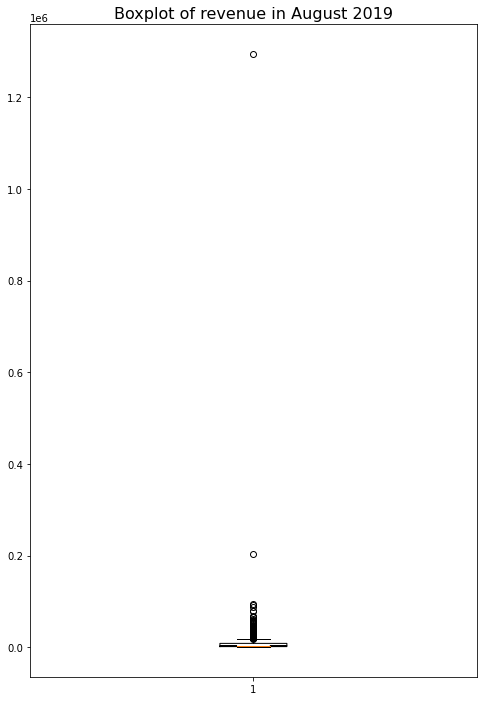

In [12]:
fig = plt.figure(figsize =(8, 12))
plt.boxplot(orders['revenue'], notch=True)
plt.title('Boxplot of revenue in August 2019',fontsize=16)
plt.show()

The distribution of revenue contains abnormally high (for this dataset) values on August 19, which strongly affects its average.

In [13]:
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

## 7. Data Description: Orders

**the table has 1197 orders and 5 variables**

transaction_id — order ID, type int64;

visitor_id — ID of the user that made the order, type int64;

date — date when the order was made, datetime64 type;

revenue — order revenue, type int64;

group — the A/B test group, object type.

*The data does not contain gaps or duplicates. Variable types do not need to be changed. Variable names were lowercased.*

*The dataset contains 58 intersecting users, this is 10% of the users of each group, in real life the test should be stopped and the developers should figure out what is wrong with the algorithm that assigns users to groups. Since we cannot stop the test in this project at this stage and we cannot delete 10% of the users of each group, we will leave everything as it is.*

## 8. Data Preprocessing: Visitors

In [14]:
visitors=pd.read_csv('visitors.csv')
display(visitors)
display(visitors.info())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [15]:
print(visitors['group'].value_counts())

B    31
A    31
Name: group, dtype: int64


In [16]:
print(visitors['visitors'].describe())

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64


In [17]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
print(visitors['date'].describe())

count                      62
unique                     31
top       2019-08-27 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object


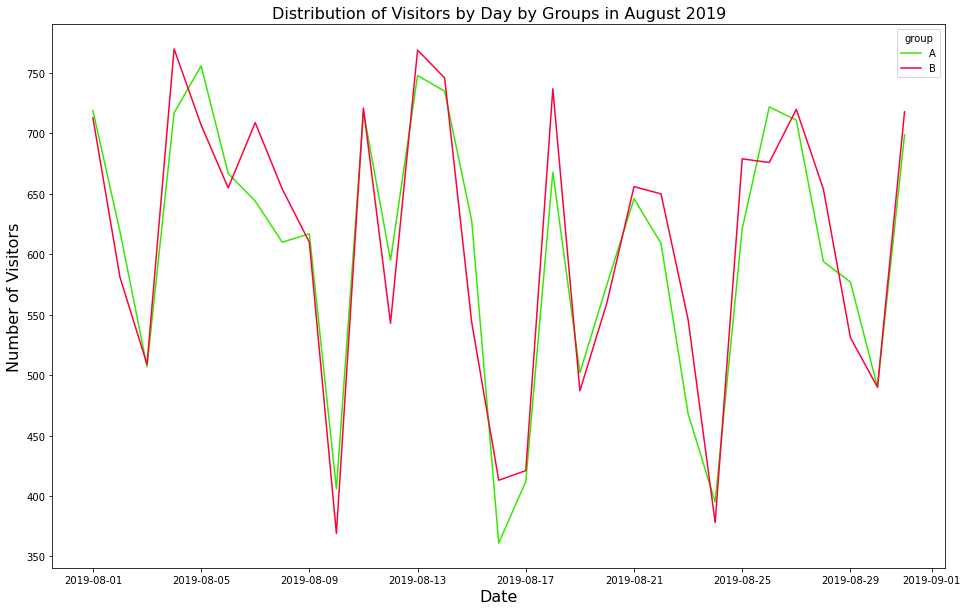

In [18]:
plt.figure(figsize=(16, 10))
sns.lineplot(x='date', y='visitors', hue='group', data=visitors, palette="prism", markers=True)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of Visitors',fontsize=16)
plt.title('Distribution of Visitors by Day by Groups in August 2019',fontsize=16)
plt.show()

## 9. Data Description: Visitors

**62 rows, 3 variables**

date - datetime64 type;

group — A/B test group, object type;

visitors — number of visitors, type int64

*Data does not contain gaps, outliers or duplicates. Variable types and names do not need to be changed.*

The distribution of visitors seems fine, it has in average 607 users per group per day, a minimum of 361 users per group per day, and a maximum of 770 users per group per day. The distribution does not contain abnormal values

## 10. A/B Test Results Analysis

### 10.1 Cumulative revenue by groups

In [19]:
#deleting duplicates
datesGroups = orders[['date','group']].drop_duplicates() 

#grouping revenue by day
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#calculating cumulative revenue by day
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#renaming the columns
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

print(ordersAggregated)

          date group  orders  buyers  revenue
55  2019-08-01     A      24      20   148579
66  2019-08-01     B      21      20   101217
175 2019-08-02     A      44      38   242401
173 2019-08-02     B      45      43   266748
291 2019-08-03     A      68      62   354874
..         ...   ...     ...     ...      ...
496 2019-08-29     B     596     544  5559398
730 2019-08-30     A     545     493  4022970
690 2019-08-30     B     620     567  5774631
958 2019-08-31     A     557     503  4084803
930 2019-08-31     B     640     586  5907760

[62 rows x 5 columns]


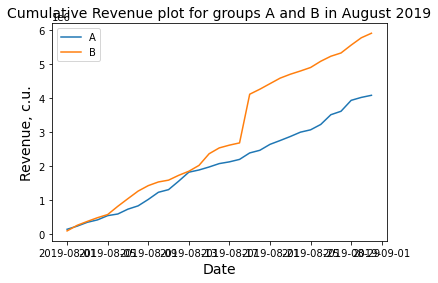

In [20]:
#dataframe with cumulative number of orders and cumulative revenue by day in group A
cumulativeRevenueA = ordersAggregated[ordersAggregated['group']=='A'][['date','revenue', 'orders']]

#dataframe with cumulative number of orders and cumulative revenue by day in group B
cumulativeRevenueB = ordersAggregated[ordersAggregated['group']=='B'][['date','revenue', 'orders']]

#revenue plot for group A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

#revenue plot for group B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Revenue, c.u.',fontsize=14)
plt.title('Cumulative Revenue plot for groups A and B in August 2019',fontsize=14)
plt.legend()
plt.show()

Groups A and B have approximately the same cumulative revenue from August 1 to August 5, 2019 and August 14, 2019.

Ffrom August 5 till August 19 (except August 14, 2019), group B overtakes group A in terms of cumulative revenue.

On August 19-20, 2019, there is a jump in revenue in group B, group A does not have any chances to close the gap (20,000 c.u.) until the end of the observation period.

### 10.2 Cumulative revenue per order by groups

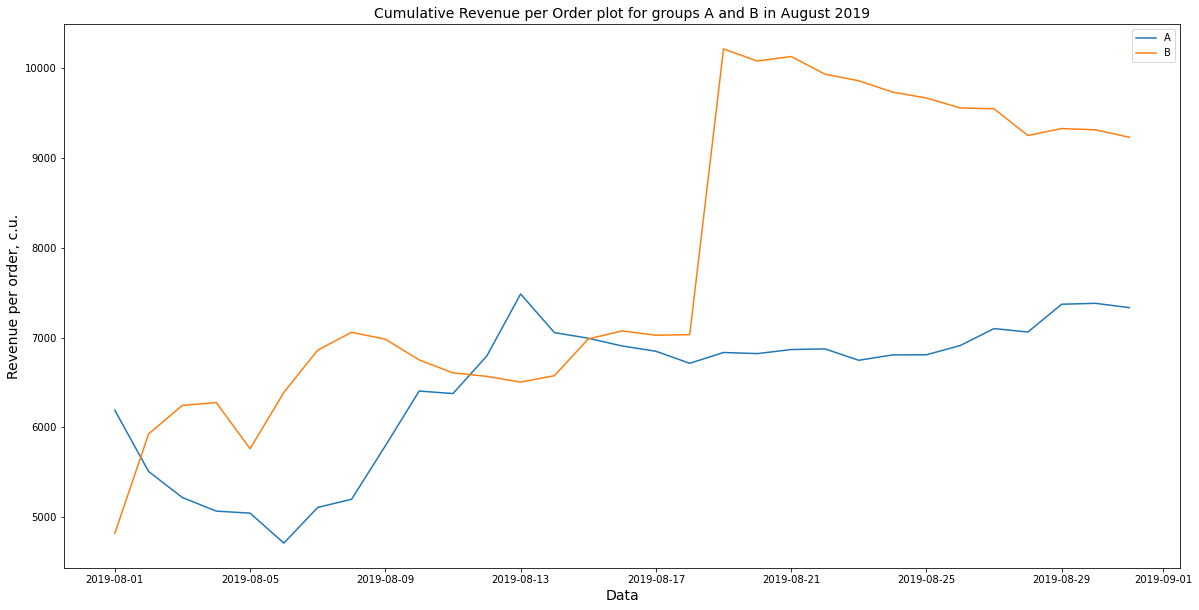

In [21]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel('Data',fontsize=14)
plt.ylabel('Revenue per order, c.u.',fontsize=14)
plt.title('Cumulative Revenue per Order plot for groups A and B in August 2019',fontsize=14)
plt.legend()
plt.show()

The cumulative average order revenue of group A is greater than the cumulative average order revenue of group B on August 1 and from August 11 to 15. The rest of the time, the cumulative average order revenue of group B is much higher than of group A.

On August 18-19, group B has abnormally huge orders (a sharp spike on the chart).

After September 19, the cumulative average order revenue goes up slightly for group A and falls after a sharp surge for group B. 

### 10.3 Relative change in the cumulative average order revenue of group B to group A.

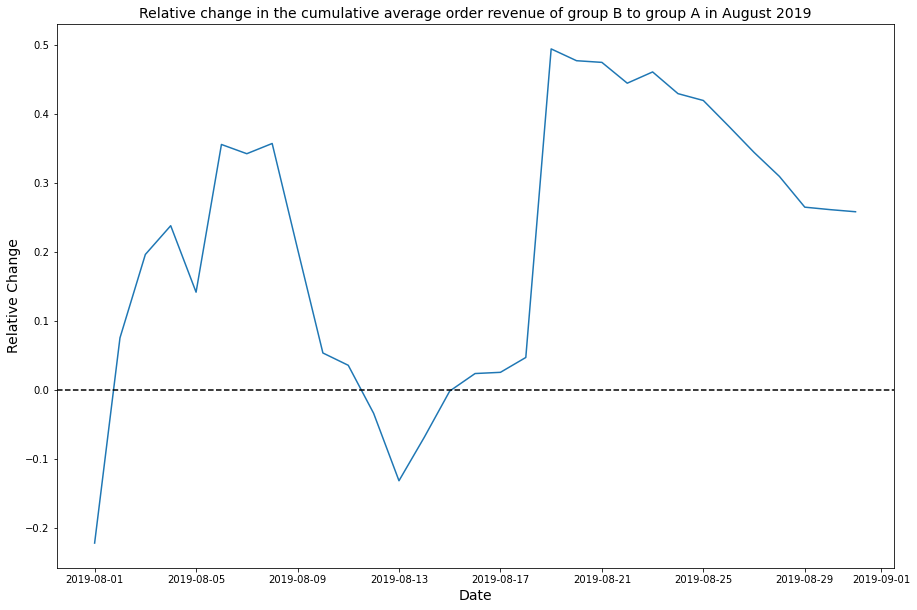

In [22]:
#merging the dataframes
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#building comparison
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

#building a graph
plt.axhline(y=0, color='black', linestyle='--') 

plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Relative Change',fontsize=14)
plt.title('Relative change in the cumulative average order revenue of group B to group A in August 2019',fontsize=14)
plt.show()

Group B catches up with group A in terms of the cumulative average order revenue on August 2 and is ahead of it during the entire observation period, except for the period from August 11 to 15.

At several points, the graph of the difference between the segments jumps sharply. Large orders and emissions are definitely hidden here! We'll find them later.

### 10.4 Cumulative conversion per groups

In [23]:
#grouping visitors by day
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

#merging the visitors with buyers 
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

#renaming the columns
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

#calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

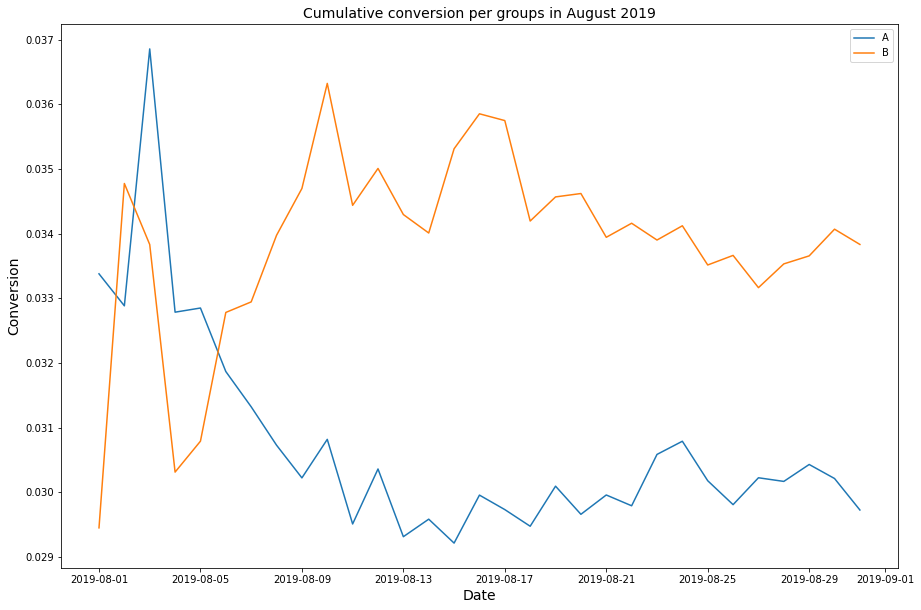

In [28]:
#dataframe for group A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#dataframe for group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#building the graph
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Conversion',fontsize=14)
plt.title('Cumulative conversion per groups in August 2019',fontsize=14)
plt.legend()
plt.show()

Groups fluctuated around the same value until August 6, but then group B's conversion went ahead.

### 10.5 Relative change in cumulative conversion of group B to group A

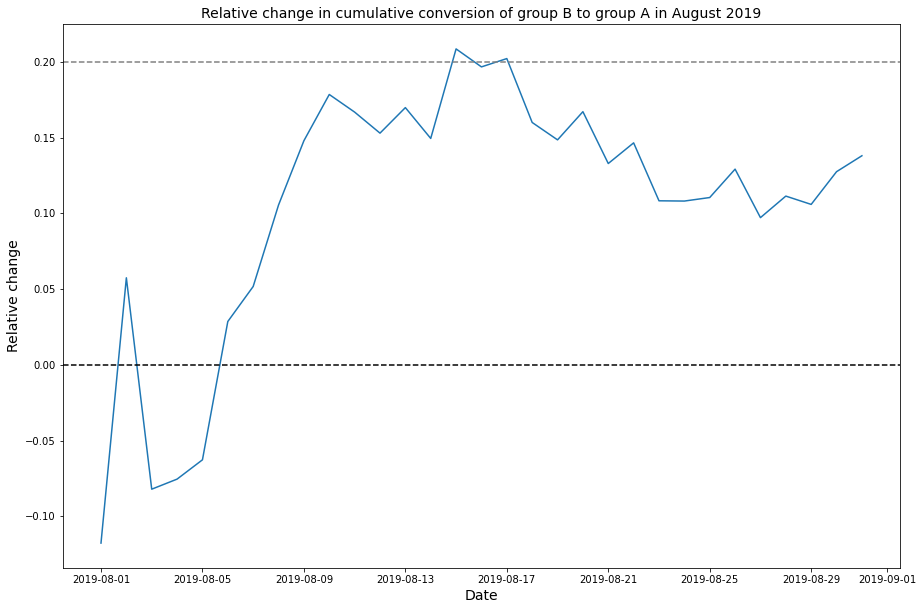

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Relative change',fontsize=14)
plt.title('Relative change in cumulative conversion of group B to group A in August 2019',fontsize=14)
plt.show()

Groups fluctuated around the same value until August 6, but then group B's conversion went ahead.

### 10.6 Scatter plot of the number of orders per user

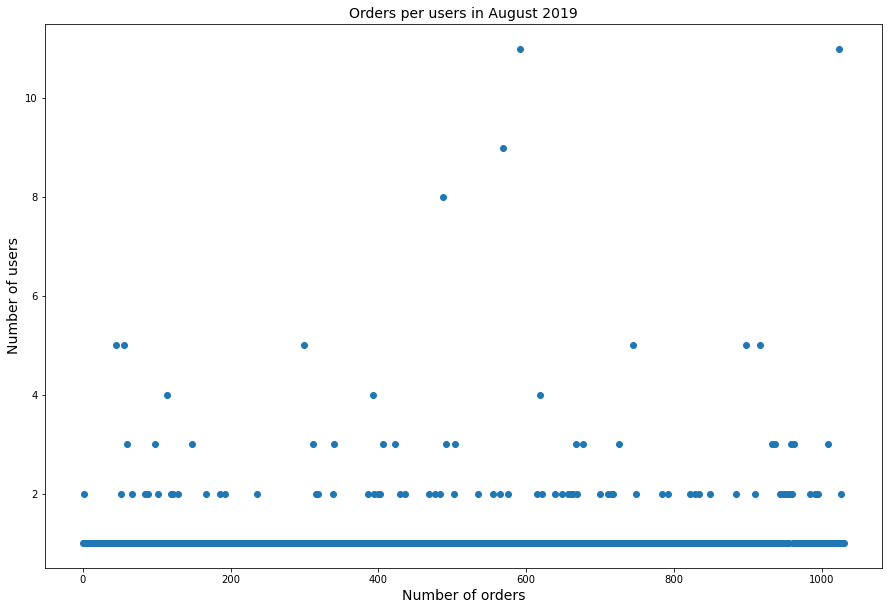

In [32]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsers.columns = ['visitor_id', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders']) 

plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel('Number of orders',fontsize=14)
plt.ylabel('Number of users',fontsize=14)
plt.title('Orders per users in August 2019',fontsize=14)
plt.show()

The graph shows that there are outliers in the number of orders per user. Let's find the 95th and 99th percentiles to detect otliers.

### 10.7 Calculate the 95th and 99th percentiles of orders per user

In [37]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

No more than 5% of buyers make more than 4 orders and no more than 1% - more than 2.

### 10.8 Plot a scatter plot of orders revenues

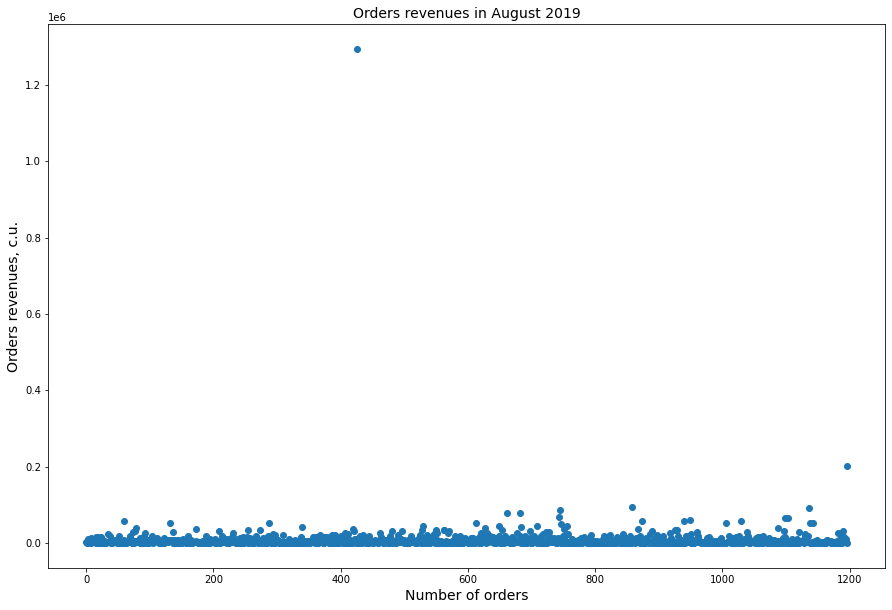

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))
_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel('Number of orders',fontsize=14)
plt.ylabel('Orders revenues, c.u.',fontsize=14)
plt.title('Orders revenues in August 2019',fontsize=14)
plt.show()

There are two abnormally expensive orders, one costs more than 1200 thousand c.u., one is about 200 thousand c.u. Let's find the 95th and 99th percentiles to detect otliers.

### 10.9 Calculate the 95th and 99th percentiles of revenues

In [36]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

No more than 5% of orders cost more than 28 thousand c.u. and not more than 1% over 58233 thousand c.u.

### 10.10 Calculate the statistical significance of differences in conversion between groups on raw data

*Null hypothesis:* Conversions in groups A and B in raw data are the same<br>
*Alternative hypothesis:* Conversions in groups A and B according in raw data are different.

The hypothesis is tested by the Mann-Whitney test stats.mannwhitneyu. If the pvalue of the method result is less than 0.05 -> we reject the null hypothesis, the conversion between groups are different.

In [38]:
#Calculating the cumulative number of orders per day for group A and group B

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#Combining ordersADaily and ordersBDaily

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

#Creating ordersByUsersA and ordersByUsersB variables with columns ['visitor_id', 'orders']. They indicate the number of completed orders.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

#Declaring variables sampleA and sampleB, in which users from different groups will correspond to the number of orders.
#Those who did not order anything will have zeros. This is necessary to prepare the samples for Mann-Whitney test.

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value =',"{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Relative difference in conversion', "{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/
                       (data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

p-value = 0.00840
Relative difference in conversion 0.138


The first number — p-value = 0.00840 is less than 0.05. 

Hence, we reject the null hypothesis. There is a difference in conversion between groups.

In raw data, group B greatly outperforms group A in terms of conversion. 

Group B's relative conversion gain is 13.8%.

### 10.11 Calculate the statistical significance of the differences in the average order revenue between groups on raw data

*Null hypothesis:* The average order revenue in groups A and B are the same in raw data<br>
*Alternative hypothesis:* The average order revenue in groups A and B are different in raw data.

The hypothesis is tested by the Mann-Whitney test stats.mannwhitneyu. If the pvalue of the method result is less than 0.05 -> we reject the null hypothesis.

In [41]:
print('p-value =','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Relative difference in the average order revenue','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.365
Relative difference in the average order revenue 0.259


P-value 0.365 is significantly greater than 0.05. This means that there are no reasons to reject the null hypothesis. The average order revenue in groups A and B are the same in raw data.

### 10.12 Calculate the statistical significance of differences in conversion between groups on cleaned data

*Null hypothesis:* Conversions in groups A and B in cleaned data are the same<br>
*Alternative hypothesis:* Conversions in groups A and B according in cleaned data are different.

The hypothesis is tested by the Mann-Whitney test stats.mannwhitneyu. If the pvalue of the method result is less than 0.05 -> we reject the null hypothesis, the conversion between groups are different.

In [45]:
#Removing 5% of customers with the largest number of orders (>2) and 5% of the most expensive orders (>28000 c.u.) 
#Aand recalculating the conversion and order revenue.

#Finding all users with abnormal number of orders
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)

#Finding all clients with abnormal orders
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.shape)

(74,)


In [46]:
#Filtering abnormal users and orders

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [47]:
#Applying the Mann-Whitney test to the obtained samples:
print('p-value =','{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное отличие в конверсии', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.007
Относительное отличие в конверсии 0.173


In order to clean data, we removed 5% of customers with the largest number of orders (>2) and 5% of the most expensive orders (>28,000 USD). The cleaned data contains 74 fewer clients than the raw data.

In cleaned data, group B also greatly outperforms group A in terms of conversion.

The first number — p-value = 0.007 is less than 0.05. Hence, we reject the null hypothesis. Group B's relative conversion gain is 17.3%.

### 10.13 Calculate the statistical significance of the differences in the average order revenue between groups on cleaned data

*Null hypothesis:* The average order revenue in groups A and B are the same in cleaned data<br>
*Alternative hypothesis:* The average order revenue in groups A and B are different in cleaned data.

The hypothesis is tested by the Mann-Whitney test stats.mannwhitneyu. If the pvalue of the method result is less than 0.05 -> we reject the null hypothesis.

In [48]:
print('p-value =',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Relative difference in the average order revenue',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.369
Relative difference in the average order revenue -0.020


P-value 0.369 is significantly greater than 0.05. There is no reason to reject the null hypothesis. There is no difference in the average order revenue between the groups in cleaned data.

### 11. Conclusion

There are no differences between the groups in the average order revenue, but group B greatly outperforms group A in terms of conversion.

The relative gain in the conversion of group B in cleaned data is 17.3%.

I would stop the test and implement changes from group B, even if the average order revenue of group B is equal to the average order revenue of group A, the changes implemented in group B bring more paying customers to the service.
